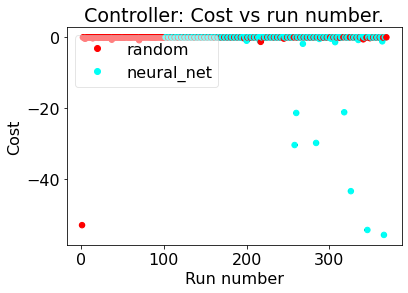

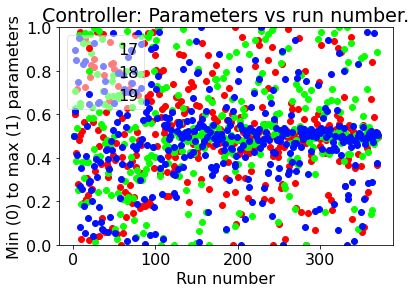

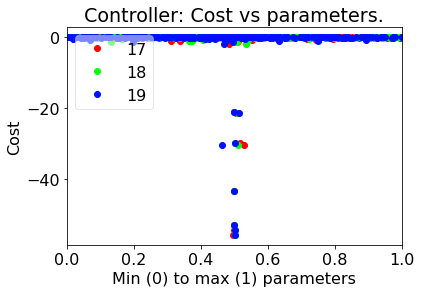

In [16]:
import mloop.visualizations as mlv
import matplotlib.pyplot as plt

mlv.configure_plots()
a = mlv.ControllerVisualizer('../M-LOOP_archives/20Param9-18.txt')
a.param_numbers = [17, 18, 19]

a.create_visualizations()
plt.show()


In [3]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import mloop.utilities as mlu
import numpy as np

dir = 'Z:\KRbLab\M_loop\\2022_09\\2022-09-18\summary_data_backup.mat'
def read(dir): #Get File structure for more accurate
    mat = io.loadmat(dir)
    return mat
dataOut = read(dir)


def getCost(training_filename):
    training_dict = mlu.get_dict_from_file(
        training_filename,
    )
    all_cost = mlu.safe_cast_to_array(training_dict['in_costs'])
    paramsList = np.array(training_dict['out_params'], dtype=float) 

    return all_cost, paramsList

def getExpData(indstart, indend):
    dataRb = dataOut['dataRb']
    for i, runNum in enumerate(dataRb[:, 0]):
        if str(runNum[0]) == str(indstart):
            start = i
        elif str(runNum[0]) == str(indend):
            end = i

    pkOd = np.array(dataRb[start:end, 3], dtype = float)
    NRb = np.array(dataRb[start:end, 8], dtype = float)
    Temp = np.array(dataRb[start:end, 9], dtype = float)
    sigX = np.array(dataRb[start:end, 4], dtype = float)
    sigY = np.array(dataRb[start:end, 5], dtype = float)

    return pkOd, NRb, Temp, sigX, sigY

pkOD, NRb, Temp, sigX, sigY = getExpData(2, 371)

cost, paramsList = getCost('../M-LOOP_archives/20Param9-18.txt')
n = np.arange(1, len(pkOD)+1)


Text(0, 0.5, 'pkOD')

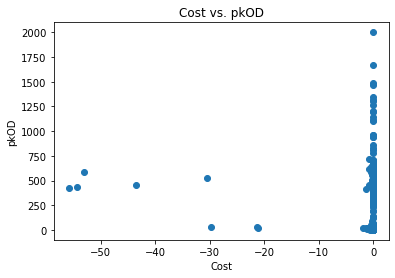

In [2]:
plt.title('Cost vs. pkOD')
plt.scatter(cost, pkOD)
plt.xlabel('Cost')
plt.ylabel('pkOD')



In [ ]:
plt.title('Cost vs. NRb')
plt.scatter(cost, NRb)
plt.xlabel('Cost')
plt.ylabel('NRb')



In [ ]:
plt.title('Cost vs. NRb')
plt.scatter(cost, Temp)
plt.xlabel('Cost')
plt.ylabel('Temp')


In [ ]:

#plt.plot(n, pkOD)
#plt.plot(n, NRb)
plt.title('Temperature vs. Run Number')
plt.ylabel('Temp (uK)')
plt.scatter(n, Temp)
plt.show()
plt.title('pkOD vs. Run Number')
plt.ylabel('pkOD')
plt.scatter(n, pkOD)
plt.show()
plt.title('Cost vs Run Numebr')
plt.scatter(n, cost)
plt.ylabel('cost')
plt.show()



plt.title('Atom Number vs. Run Number')
plt.ylabel('Atom Number')
plt.scatter(n, NRb)
plt.show()


In [ ]:
from scipy import integrate

def costFinderODAvg( pkOD, sigX, sigY):
    twoDgauss = lambda y, x: pkOD*np.exp(-(x**2/(2*sigX**2) + y**2/(2*sigY**2)))

    Avg = integrate.dblquad(twoDgauss, -3*sigX, 3*sigX, -3*sigY, 3*sigY)[0]
    return -Avg

CostV2 = []
for i, _ in enumerate(pkOD):
    CostV2.append(costFinderODAvg(pkOD[i], sigX[i], sigY[i]))
CostV2 = np.array(CostV2)

plt.plot(n, CostV2)
IndexV2 = np.where(np.isinf(CostV2), np.Inf,CostV2).argmin()

print(paramsList[IndexV2])
print(NRb[IndexV2])
print(Temp[IndexV2])
print(pkOD[IndexV2])

In [ ]:
plt.scatter(NRb, CostV2)

In [ ]:
plt.scatter(Temp, CostV2)

In [ ]:
plt.scatter(pkOD, CostV2)

In [ ]:

from scipy import integrate


def costFinderpkOD(pkOD):
    return -pkOD*(1/100)
CostV3 = []
for i, _ in enumerate(pkOD):
    CostV3.append(costFinderpkOD(pkOD[i]))
CostV3 = np.array(CostV3)


In [5]:
def costFinderLit(pkOD, NRb, alpha): #Background N Get File structure for more accurate
    N1 = 7376000.0 #or 7376000.0/100
    if NRb <= 0:
        return 0
    else:
        Fn = 2/(1 + np.exp(N1/NRb))
        return -Fn*pkOD**3*NRb**(alpha-9/5)
CostV4 = []
for i, _ in enumerate(pkOD):
    CostV4.append(costFinderLit(pkOD[i], NRb[i], 0.5))
CostV4 = np.array(CostV4)

<ipython-input-5-8dd77f53ae13>:6: RuntimeWarning: overflow encountered in exp
  Fn = 2/(1 + np.exp(N1/NRb))


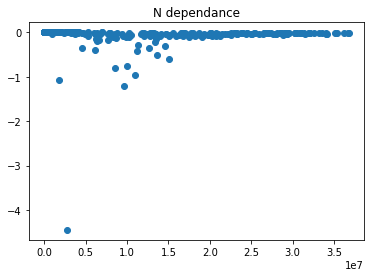

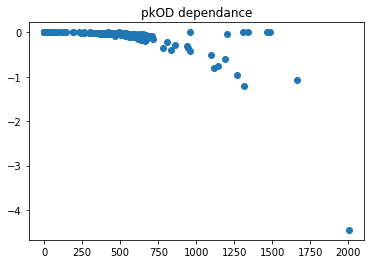

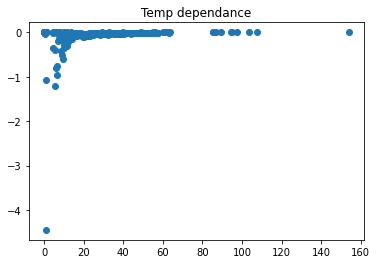

In [6]:

def CostEffect(coster):
    plt.title('N dependance')
    plt.scatter(NRb, coster)
    plt.show()
    plt.title('pkOD dependance')
    plt.scatter(pkOD, coster)
    plt.show()
    plt.title('Temp dependance')
    plt.scatter(Temp, coster)
    plt.show()
#plt.xscale('log')
CostEffect(CostV4)